### SVM Classification Accuracy

In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,mybar_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100


data_path = "../data/"

### SVM ACCURACY

p( without correction):[0.0087, 0.4653, 0.0626, 0.0, 0.0, 0.6247, 0.005]
p(correction):[0.0611, 1.0, 0.4385, 0.0, 0.0002, 1.0, 0.0352]
p( without correction):[0.6189, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29200\719249374.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig4-SVM.pdf', bbox_inches='tight')
D:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
D:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


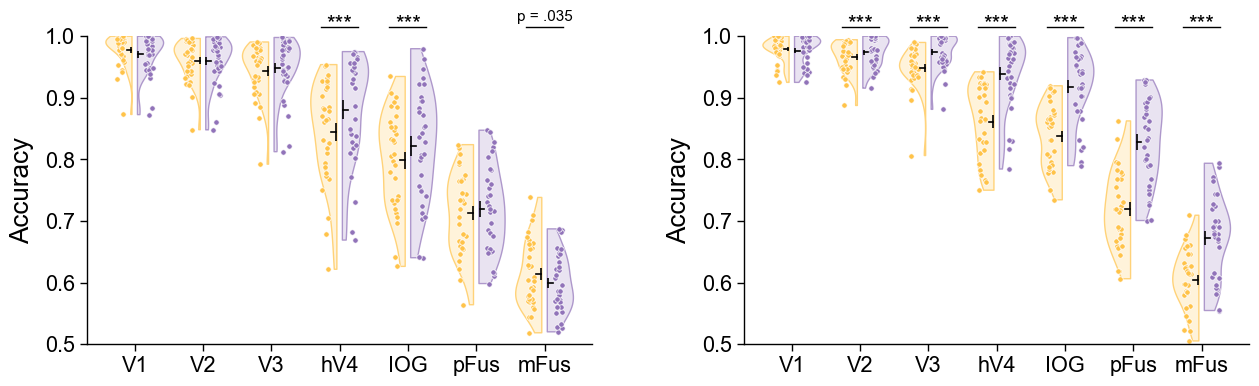

In [ ]:
acc_d_subj = np.load(data_path+'svmacc.npz',allow_pickle=True)['acc_d_subj'] # d x subj x roi x task

# average accuracy for near/far distance
acc_nf_subj = np.zeros([4*nsubj,nroi,ntask,len(nf)])*np.nan # 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = acc_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            acc_nf_subj[:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
acc_nf_subj[:,:,[0,1],:] = acc_nf_subj[:,:,[1,0],:] # 4*8samples x roi x task x nf
            
# wilcoxon test
ps_all = []
for nf_i in range(2):
    ps0,sts = pair_test(acc_nf_subj[:,:,:,nf_i],method='wilcoxon',correction='none')
    ps,sts = pair_test(acc_nf_subj[:,:,:,nf_i],method='wilcoxon',correction='bonferroni')
    print('p( without correction):{}'.format([round(p,4) for p in ps0]))
    print('p(correction):{}'.format([round(p,4) for p in ps]))
    ps_all.append(ps)

# plot
ylims = [[0.50,1,0.1],[0.50,1,0.1]]
pys = [[1.02,1.015],[1.02,1.015]]
set_figure()
fig,axes = plt.subplots(1,2,figsize=(15,4),gridspec_kw={'wspace': 0.3})
for nf_i in range(2):
    ax = axes[nf_i]
    set_ax(ax)
    myviolinplot_pair(ax,acc_nf_subj[:,:,:,nf_i],"mean","sem",ps_all[nf_i],pys[nf_i])
    ax.set_ylabel('Accuracy',labelpad=8)
    ax.set_xticklabels(roi_labels)
    ax.set_yticks(np.arange(ylims[nf_i][0],ylims[nf_i][1]*1.01,ylims[nf_i][2]))
    ax.set_xlim([0.3,7.7])
    ax.set_ylim(ylims[nf_i][:2])
    ax.set_clip_on(False)
fig.savefig('fig2-SVM.pdf', bbox_inches='tight')

### LFI

$$
LFI = \frac{1}{\Delta s^2}*\frac{|df|^2}{\underline\lambda}*\Sigma_i\frac{(\frac{df}{|df|}*\xi_i)^2}{\hat\lambda_i} \\
\hat I_{bc}=I*\frac{2T-N-3}{2T-2}-\frac{2N}{Tds^2}
$$


p( without correction):[0.1336, 0.2865, 0.0325, 0.0, 0.0008, 0.832, 0.0001]
p(correction):[0.9355, 1.0, 0.2274, 0.0002, 0.0054, 1.0, 0.0005]
p( without correction):[0.0498, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[0.3484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29200\157294676.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig4-LFI.pdf', bbox_inches='tight')
D:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
D:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


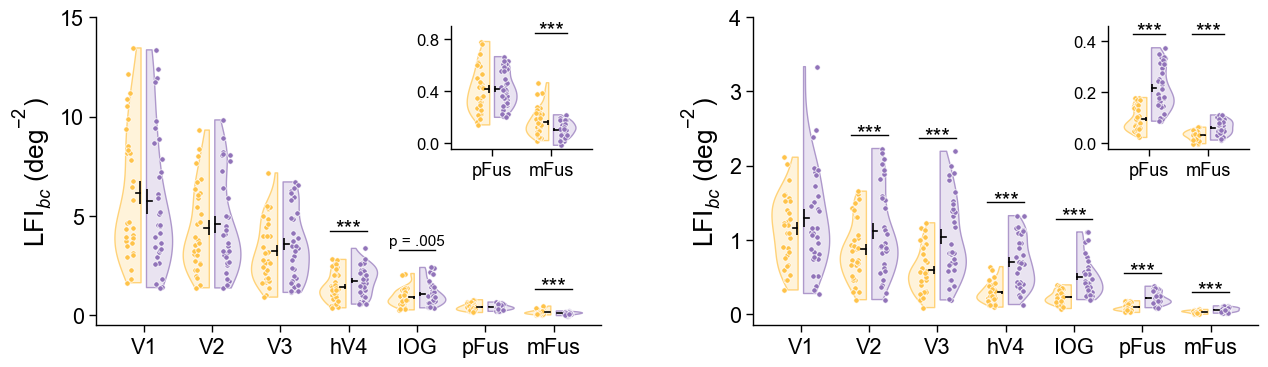

In [ ]:
# 原始数据，把FFA分布用小图放大
LFI_bc_d_subj = np.load(data_path+'LFI_bc.npz',allow_pickle=True)['LFI_bc_d_subj'] # d x subj x roi x task
# average alfi for near/far distance
LFI_bc_nf_subj = np.zeros([4*nsubj,nroi,ntask,len(nf)])*np.nan # 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = LFI_bc_d_subj[num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            LFI_bc_nf_subj[:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
LFI_bc_nf_subj[:,:,[0,1],:] = LFI_bc_nf_subj[:,:,[1,0],:] # 4*8samples x roi x task x nf


# test
ps_all = []
for nf_i in range(2):
    ps0,sts = pair_test(LFI_bc_nf_subj[:,:,:,nf_i],method='wilcoxon',correction='none')
    ps,sts = pair_test(LFI_bc_nf_subj[:,:,:,nf_i],method='wilcoxon',correction='bonferroni')
    print('p( without correction):{}'.format([round(p,4) for p in ps0]))
    print('p(correction):{}'.format([round(p,4) for p in ps]))
    ps_all.append(ps)

# plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.ticker as mtick
ytks = [[0,15,5],[0,4,1]]
ylims = [[-0.5,15],[-0.15,4]]
ylims_zoom = [[-0.05,0.9],[-0.025,0.46]]
ytks_zoom = [[0.0,0.8,0.4],[0.,0.4,0.2]]
pys = [[],[]]
pys_axins = [[0.87,0.85],[0.44,0.43]]
set_figure()
fig,axes = plt.subplots(1,2,figsize=(15,4),gridspec_kw={'wspace': 0.3})
for nf_i in range(2):
    ax = axes[nf_i]
    set_ax(ax) 
    myviolinplot_pair(ax,LFI_bc_nf_subj[:,:,:,nf_i],"mean","sem",ps_all[nf_i],pys[nf_i])
    ax.set_xticklabels(roi_labels)
    ax.set_ylabel('LFI'+'$_{bc}$'+' (deg'+'$^{-2}$'+')')
    ax.set_yticks(np.arange(ytks[nf_i][0],ytks[nf_i][1]*1.01,ytks[nf_i][2]))
    ax.set_xlim([0.3,7.7])
    ax.set_ylim(ylims[nf_i])
    # Create an inset for zoomed region
    axins = inset_axes(ax, width="28%", height="40%", loc='upper right')
    myviolinplot_pair(axins,LFI_bc_nf_subj[:,5:,:,nf_i],"mean","sem",ps_all[nf_i][5:],pys_axins[nf_i])
    axins.set_xlim(0.3,2.7)  # Adjust x limits for zoomed area
    axins.set_ylim(ylims_zoom[nf_i])  # Adjust y limits for zoomed area
    axins.set_yticks(np.arange(ytks_zoom[nf_i][0],ytks_zoom[nf_i][1]*1.01,ytks_zoom[nf_i][2]),np.arange(ytks_zoom[nf_i][0],ytks_zoom[nf_i][1]*1.01,ytks_zoom[nf_i][2]),fontsize=12)
    axins.set_xticklabels(roi_labels[5:],fontsize=13)
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False)
    axins.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))    
fig.savefig('fig2-LFI.pdf', bbox_inches='tight')